# Doublet Detection on 8k PBMCs from 10x Genomics

In [1]:
import numpy as np
import doubletdetection
import tarfile
import matplotlib.pyplot as plt

## Download Data from 10x

In [2]:
!curl -O http://cf.10xgenomics.com/samples/cell-exp/2.1.0/pbmc8k/pbmc8k_filtered_gene_bc_matrices.tar.gz
tar = tarfile.open('pbmc8k_filtered_gene_bc_matrices.tar.gz')
tar.extractall()
tar.close()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35.8M  100 35.8M    0     0  32.2M      0  0:00:01  0:00:01 --:--:-- 32.2M


### Load Count Matrix

In [3]:
matrix_path = 'filtered_gene_bc_matrices/GRCh38/matrix.mtx'
raw_counts = doubletdetection.load_mtx(matrix_path)
# Remove columns with all 0s
zero_genes = (np.sum(raw_counts, axis=0) == 0).A.ravel()
raw_counts = raw_counts[:, ~zero_genes]

## Run Doublet Detection

Here we show-off the new backend implementation that uses `scanpy`. This new implementation is over 2x faster than version 2.4.0. To use the previous version of DoubletDetection please add the parameters (`use_phenograph=True`, `verbose=True`, `standard_scaling=False`) to the classifier and use the thresholds `p_thresh=1e-7`, `voter_thresh=0.8`. We recommend first using these parameters until we further validate the new implementation.

In [4]:
clf = doubletdetection.BoostClassifier(n_iters=50, use_phenograph=False, standard_scaling=True)
doublets = clf.fit(raw_counts).predict(p_thresh=1e-16, voter_thresh=0.5)

## Visualize Results

### Convergence of doublet calls

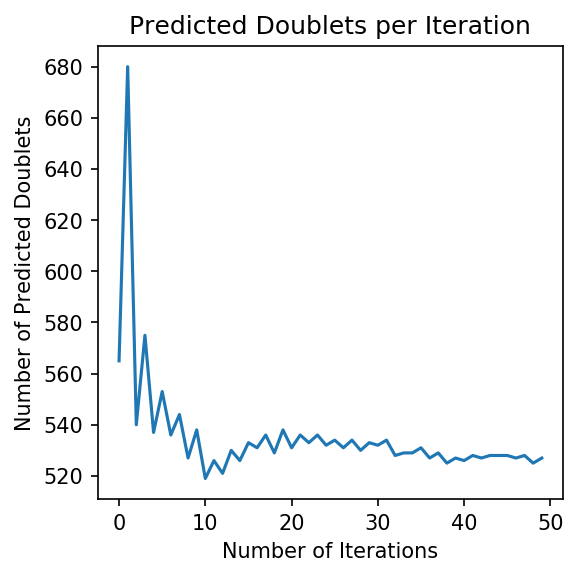

In [5]:
f = doubletdetection.plot.convergence(clf, save='convergence_test.pdf', show=True, p_thresh=1e-16, voter_thresh=0.5)

### Doublets on umap

/usr/local/lib/python3.7/site-packages/doubletdetection/plot.py:129: UserWarning: Sparse raw_counts is automatically densified.
  warnings.warn("Sparse raw_counts is automatically densified.")


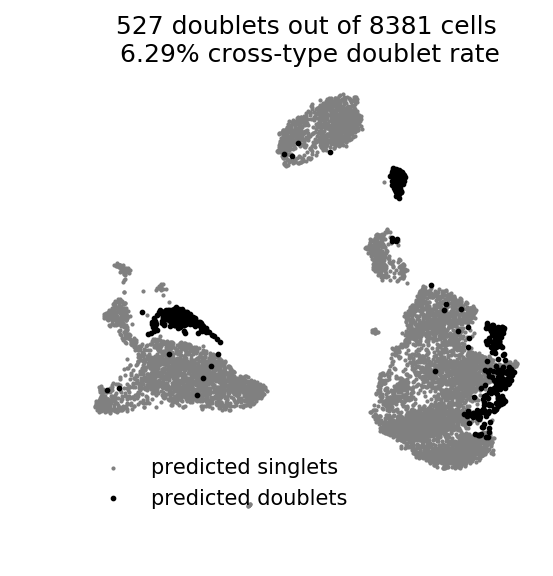

In [6]:
f2, umap_coords = doubletdetection.plot.umap_plot(raw_counts, doublets, random_state=1, 
                                                       save='umap_test.pdf', show=True)

### Number of predicted doublets at different threshold combinations

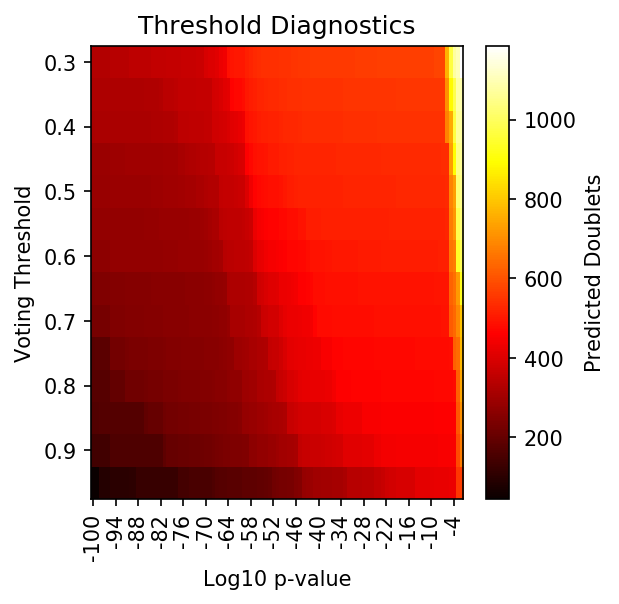

In [7]:
f3 = doubletdetection.plot.threshold(clf, save='threshold_test.pdf', show=True, p_step=6)